# Visualizing Earnings Based On College Majors

The dataset on includes information job outcomes of students who graduated from college between __2010__ and __2012__. The original data on job outcomes was released by <a href="https://www.census.gov/programs-surveys/acs/">American Community Survey</a>, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their <a href="https://github.com/fivethirtyeight/data/tree/master/college-majors">Github repo</a>.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. The dataset columns are:

- __Rank:__ Rank by median earnings
- __Major_code:__	Major code, FO1DP in ACS PUMS
- __Major:__	Major description
- __Major_category:__	Category of major from Carnevale et al
- __Total:__	Total number of people with major
- __Sample_size:__	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- __Men:__	Male graduates
- __Women:__	Female graduates
- __ShareWomen:__	Women as share of total
- __Employed:__	Number employed (ESR == 1 or 2)
- __Full_time:__	Employed 35 hours or more
- __Part_time:__	Employed less than 35 hours
- __Full_time_year_round:__	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- __Unemployed:__	Number unemployed (ESR == 3)
- __Unemployment_rate:__	Unemployed / (Unemployed + Employed)
- __Median:__	Median earnings of full-time, year-round workers
- __P25th:__	25th percentile of earnings
- __P75th:__	75th percentile of earnings
- __College_jobs:__	Number with job requiring a college degree
- __Non_college_jobs:__	Number with job not requiring a college degree
- __Low_wage_jobs:__	Number in low-wage service jobs

## Objectives

Using the different pandas plotting function to do an analysis of this dataset, will make us interpret and answer the following objectives:
 - See if students in more popular majors make more money
 - See how many majors are predominantly male and predominantly female
 - See which category of majors have the most students

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


## Cleaning the Dataset

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
recent_grads.shape

(173, 21)

In [8]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

The dataset has __173__ rows and __21__ columns.

In [9]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

The columns __Total, Men, Women, and ShareWomen__ contain __1__ row with null values.

In [10]:
recent_grads = recent_grads.dropna()
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [11]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [12]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

After removing the rows with null values, the dataset contains __172__ rows from the total __173__ rows.

In [13]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [14]:
columns_names = ['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'share_women', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs']

In [15]:
recent_grads.columns = columns_names
recent_grads.head(5)

,rank,major_code,major,total,men,women,major_category,share_women,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


The columns where changed from no format to __snakecase__ following the Python standards.

## Dataset Analysis

To get an answer for each objective, we are going to generate different types of plots to get answers.

## Scatter Plots

First of all we are going to genereate <a href="https://en.wikipedia.org/wiki/Scatter_plot">__Scatter Plots__</a> comparing different relations.

Text(0, 0.5, 'Median')

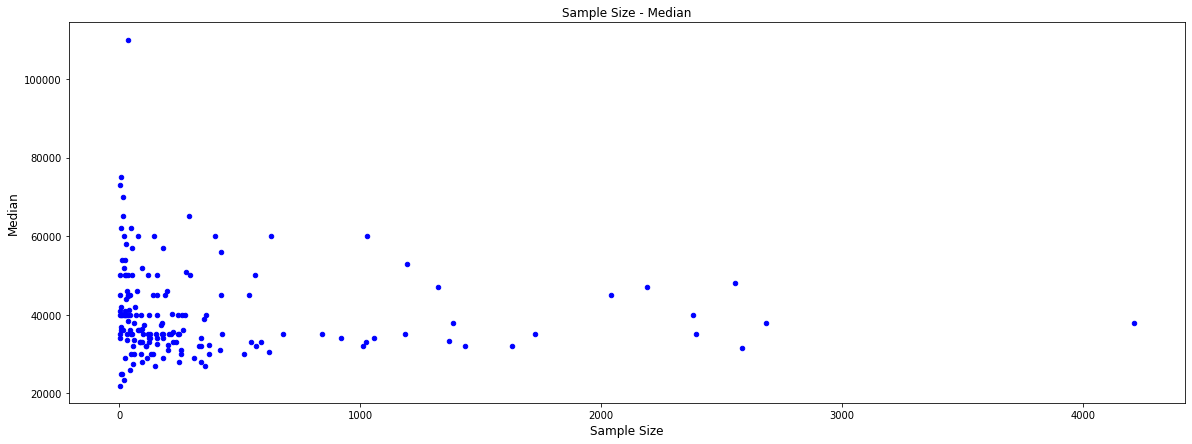

In [16]:
ax = recent_grads.plot(x="sample_size", y="median", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Sample Size - Median")
ax.set_xlabel("Sample Size", size=12)
ax.set_ylabel("Median", size=12)

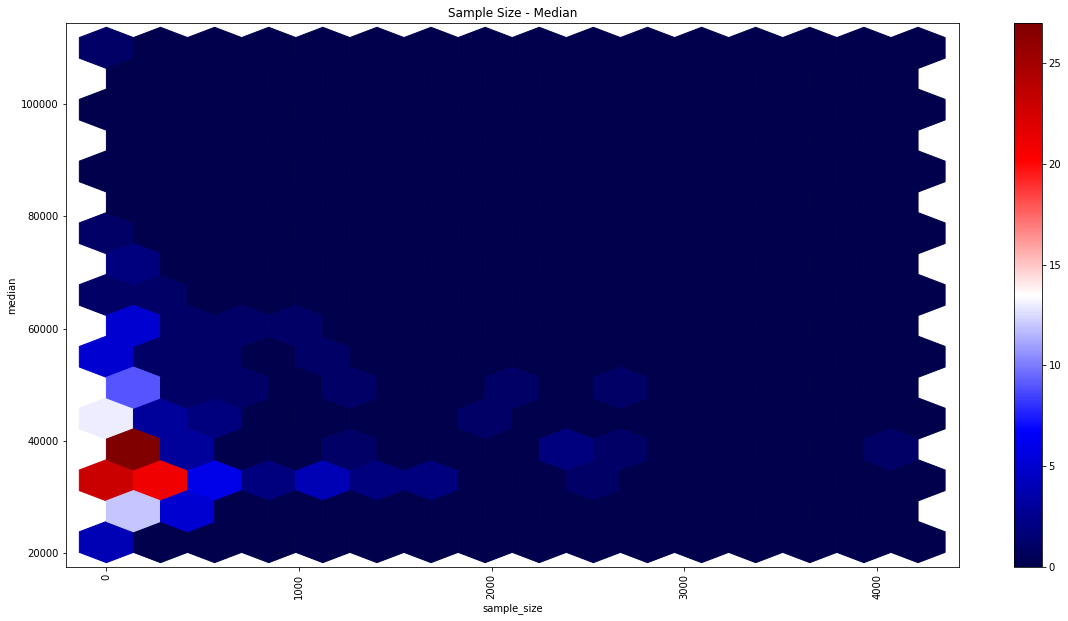

In [69]:
recent_grads.plot.hexbin(x = "sample_size", y = "median", title = "Sample Size - Median", 
                         gridsize = (15), figsize = (20,10), colormap = 'seismic', sharex=False, rot = 90)


Text(0, 0.5, 'Unemployment Rate')

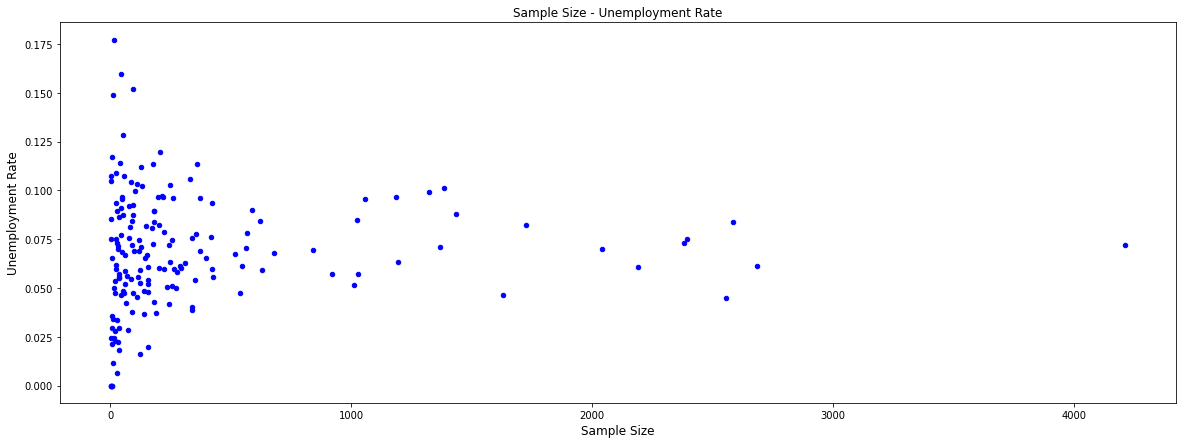

In [17]:
ax = recent_grads.plot(x="sample_size", y="unemployment_rate", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Sample Size - Unemployment Rate")
ax.set_xlabel("Sample Size", size=12)
ax.set_ylabel("Unemployment Rate", size=12)

Text(0, 0.5, 'Median')

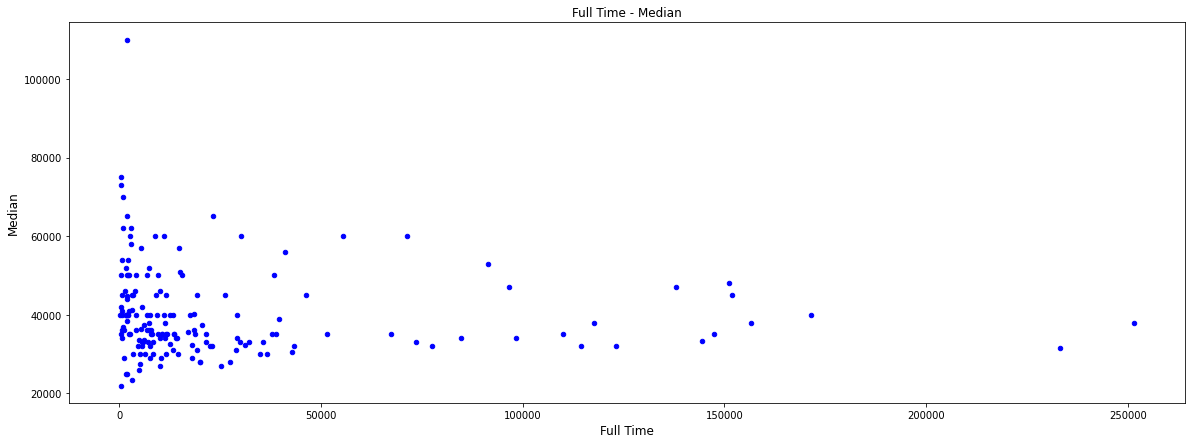

In [18]:
ax = recent_grads.plot(x="full_time", y="median", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Full Time - Median")
ax.set_xlabel("Full Time", size=12)
ax.set_ylabel("Median", size=12)

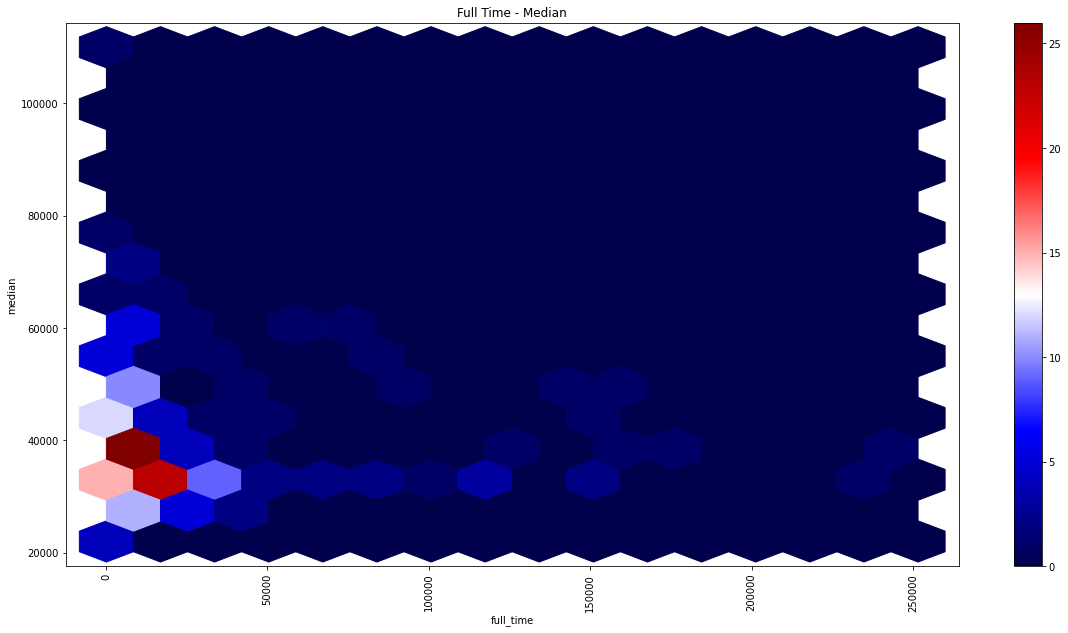

In [68]:
recent_grads.plot.hexbin(x = "full_time", y = "median", title = "Full Time - Median", 
                         gridsize = (15), figsize = (20,10), colormap = 'seismic', sharex=False, rot = 90)

Text(0, 0.5, 'Unemployment Rate')

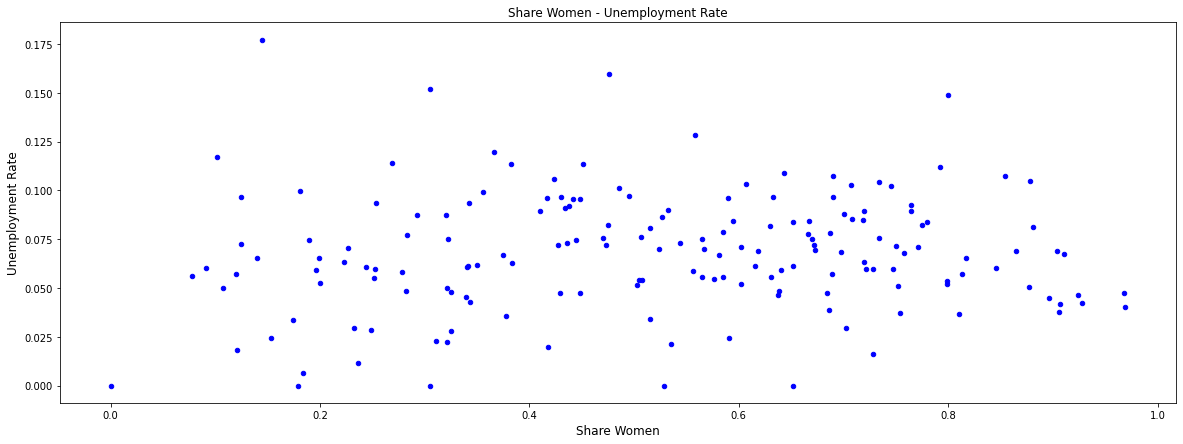

In [19]:
ax = recent_grads.plot(x="share_women", y="unemployment_rate", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Share Women - Unemployment Rate")
ax.set_xlabel("Share Women", size=12)
ax.set_ylabel("Unemployment Rate", size=12)

Text(0, 0.5, 'Median')

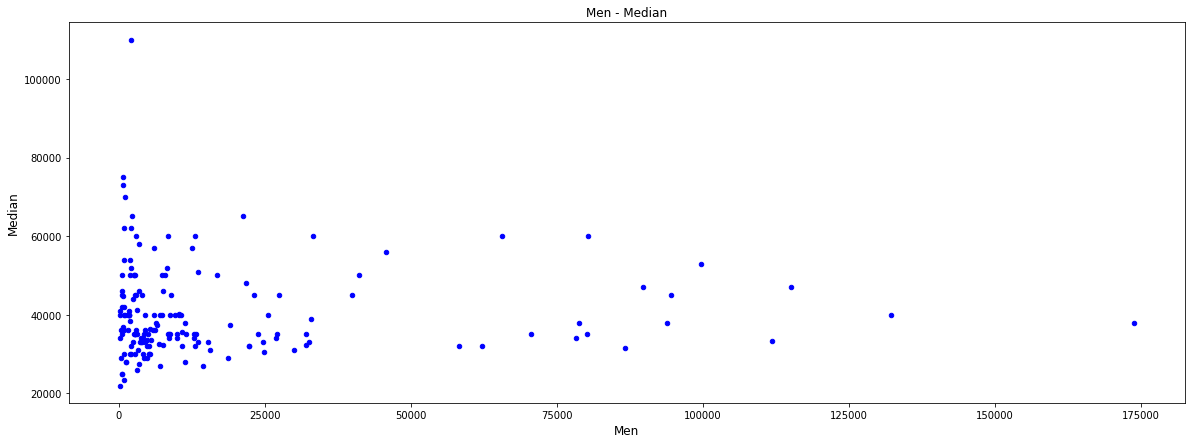

In [70]:
ax = recent_grads.plot(x="men", y="median", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Men - Median")
ax.set_xlabel("Men", size=12)
ax.set_ylabel("Median", size=12)

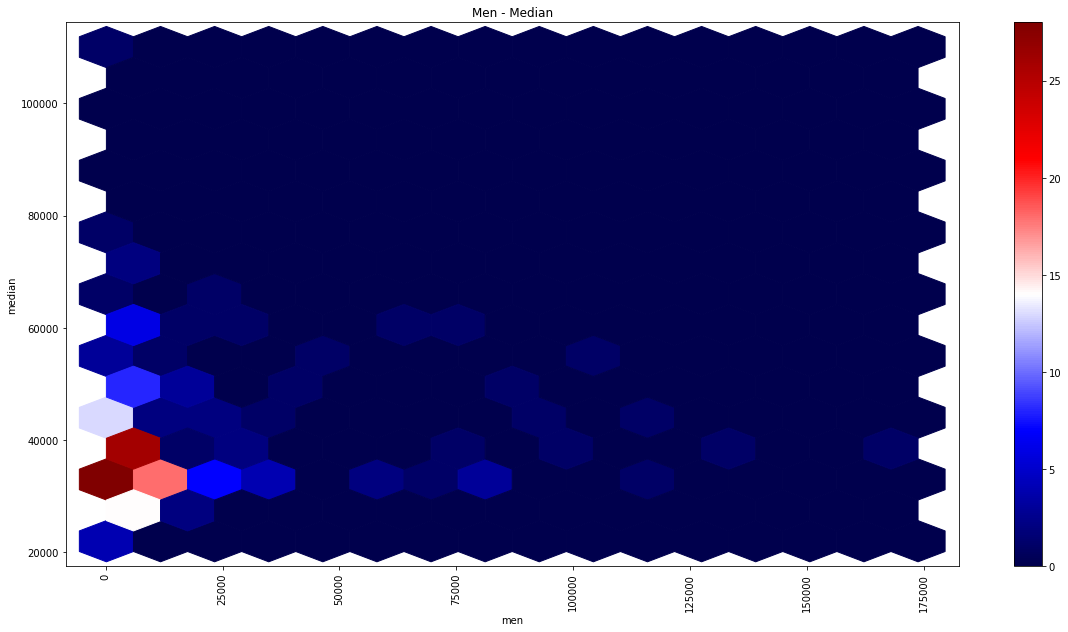

In [71]:
recent_grads.plot.hexbin(x = "men", y = "median", title = "Men - Median", 
                         gridsize = (15), figsize = (20,10), colormap = 'seismic', sharex=False, rot = 90)

Text(0, 0.5, 'Median')

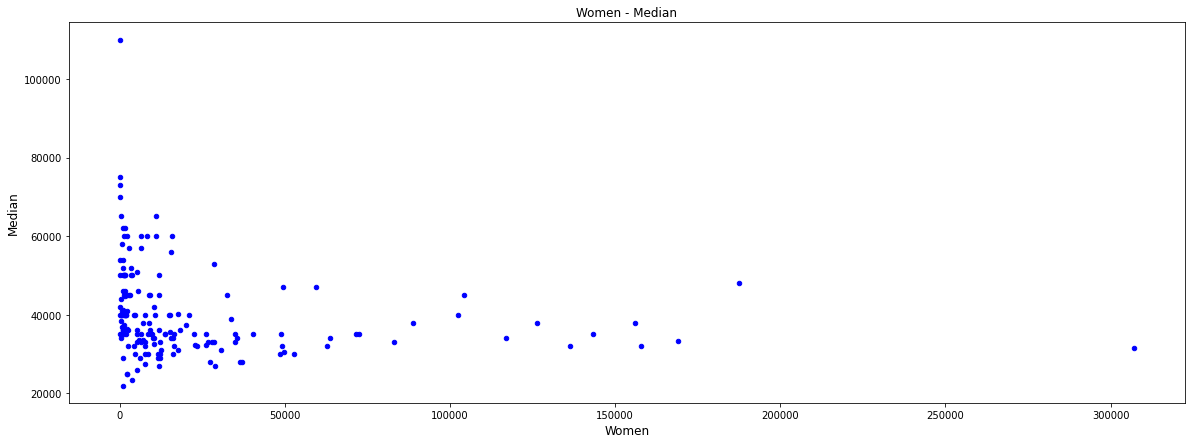

In [21]:
ax = recent_grads.plot(x="women", y="median", kind="scatter", color="blue", figsize=(20, 7))
ax.set_title("Women - Median")
ax.set_xlabel("Women", size=12)
ax.set_ylabel("Median", size=12)

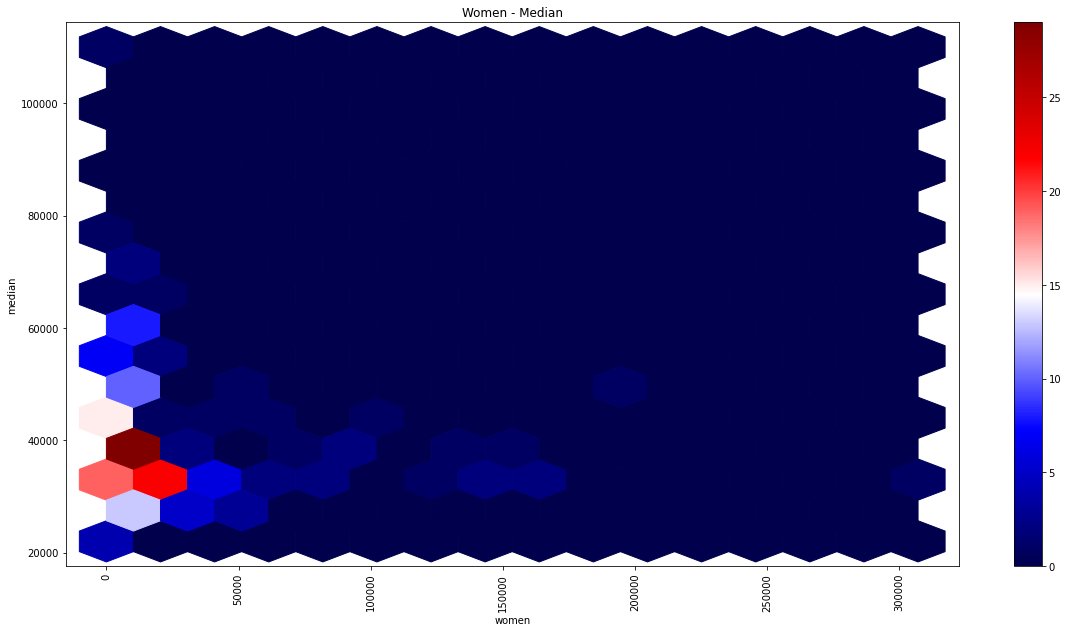

In [73]:
recent_grads.plot.hexbin(x = "women", y = "median", title = "Women - Median", 
                         gridsize = (15), figsize = (20,10), colormap = 'seismic', sharex=False, rot = 90)

From the previous plots, we can't reach a final conclusion for all the objectives but we can give an aproximate answer to the following questions:

- __Do students in more popular majors make more money?__

    From the last two plots, __Men - Median__ and __Women - Median__ we can see that the majors with fewer students, independently if they are men or women, have a higher median earning of full time jobs.
    

- __Do students that majored in subjects that were majority female make more money?__

    Fom the previous plots we can't give an extensed answer but as in the previous question if we compare the last two plots,  __Men - Median__ and __Women - Median__ we can see that for __Men__ the major agruppation in the plot is between __20.000 - 40.000__ the same as for __Women__, then we can give a first approach to this answer that students majored in subjects were majority female don't make more money.
    

- __Is there any link between the number of full-time employees and median salary?__

    Analyzing the __Full Time - Median__ scatter plot, we can answer that majors that had a bigger number of full-time employees, earned the same or less than the ones with a lowe number of full-time employees. 

## Histograms 

Secondly, using <a href="https://en.wikipedia.org/wiki/Histogram">__Histograms__</a> to explore the distribution of the different columns.

In [22]:
recent_grads.describe()

,rank,major_code,total,men,women,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Text(0, 0.5, 'Value Counts')

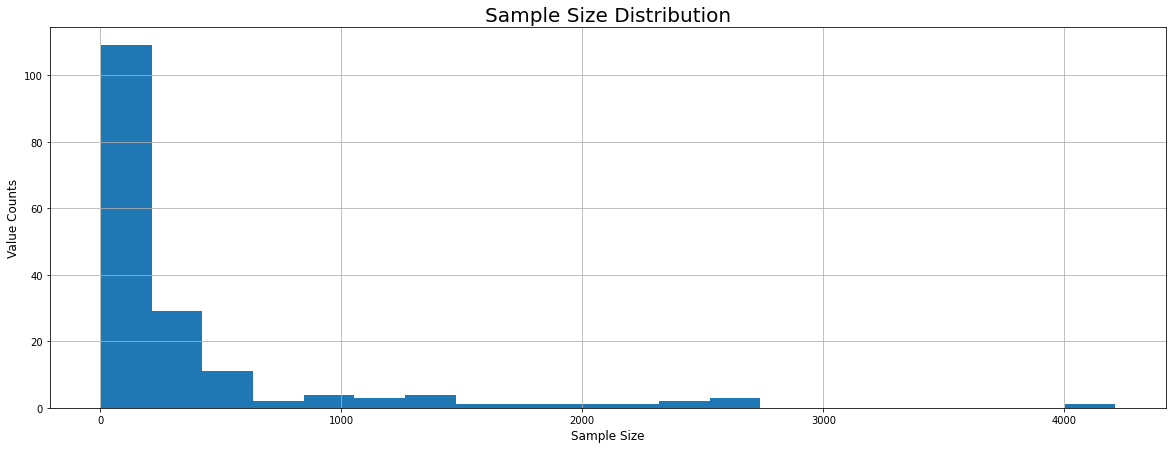

In [23]:
ax = recent_grads['sample_size'].hist(bins=20, figsize=(20, 7))
ax.set_title("Sample Size Distribution", size=20)
ax.set_xlabel("Sample Size", size=12)
ax.set_ylabel("Value Counts", size=12)

Text(0, 0.5, 'Value Counts')

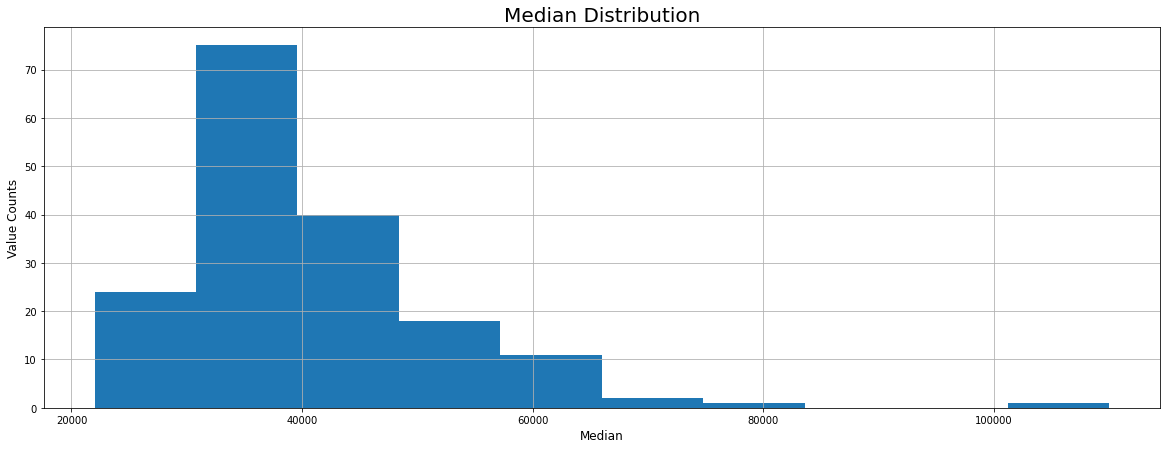

In [24]:
ax = recent_grads['median'].hist(figsize=(20, 7))
ax.set_title("Median Distribution", size=20)
ax.set_xlabel("Median", size=12)
ax.set_ylabel("Value Counts", size=12)

From this histogram, we can answer that the median salary of full-time employers is between __30.000__ and __40.000__. We can use the next function to extract the exact number:

In [25]:
recent_grads['median'].median()

36000.0

After checking it with the median function, we can answe that the median salary is __36.000__.

Text(0, 0.5, 'Value Counts')

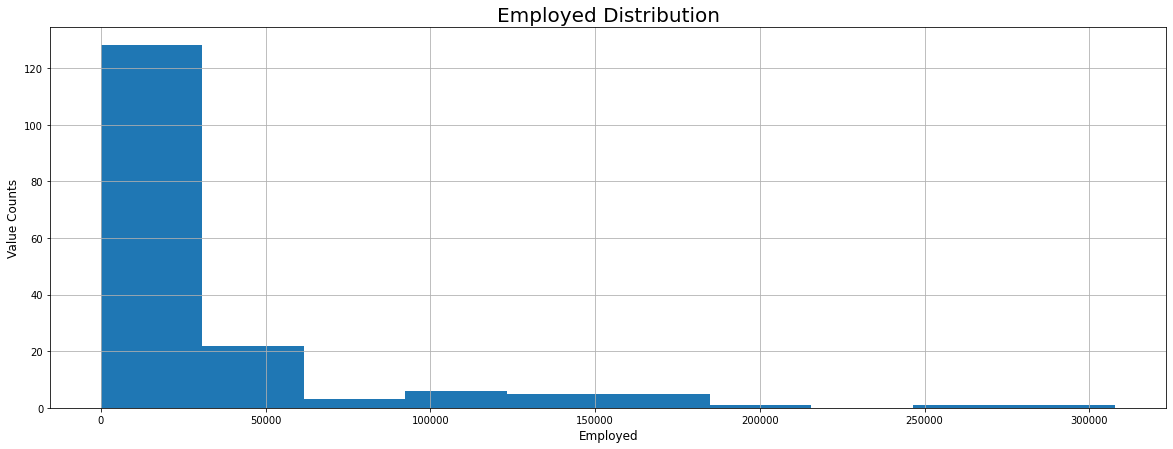

In [26]:
ax = recent_grads['employed'].hist(figsize=(20, 7))
ax.set_title("Employed Distribution", size=20)
ax.set_xlabel("Employed", size=12)
ax.set_ylabel("Value Counts", size=12)

Text(0, 0.5, 'Value Counts')

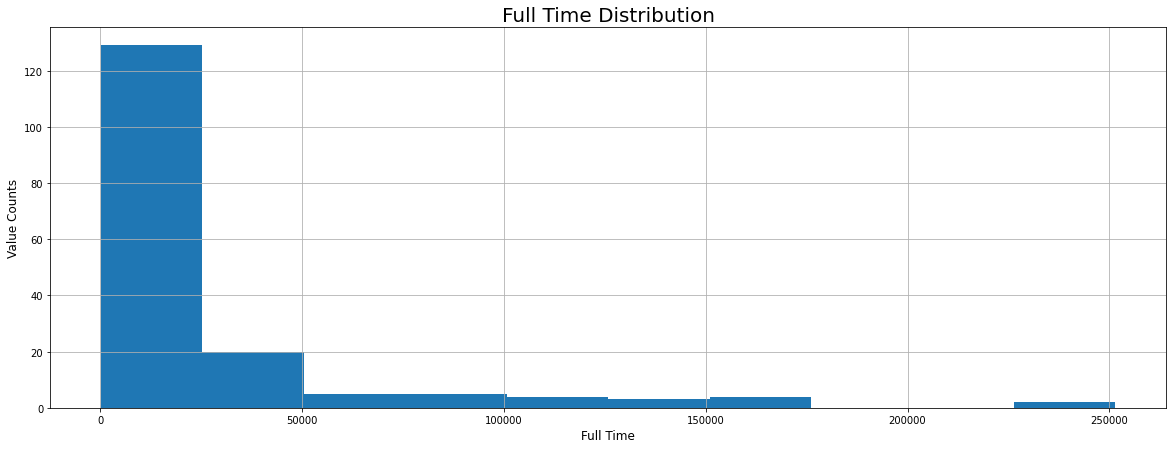

In [27]:
ax = recent_grads['full_time'].hist(figsize=(20, 7))
ax.set_title("Full Time Distribution", size=20)
ax.set_xlabel("Full Time", size=12)
ax.set_ylabel("Value Counts", size=12)

Text(0, 0.5, 'Value Counts')

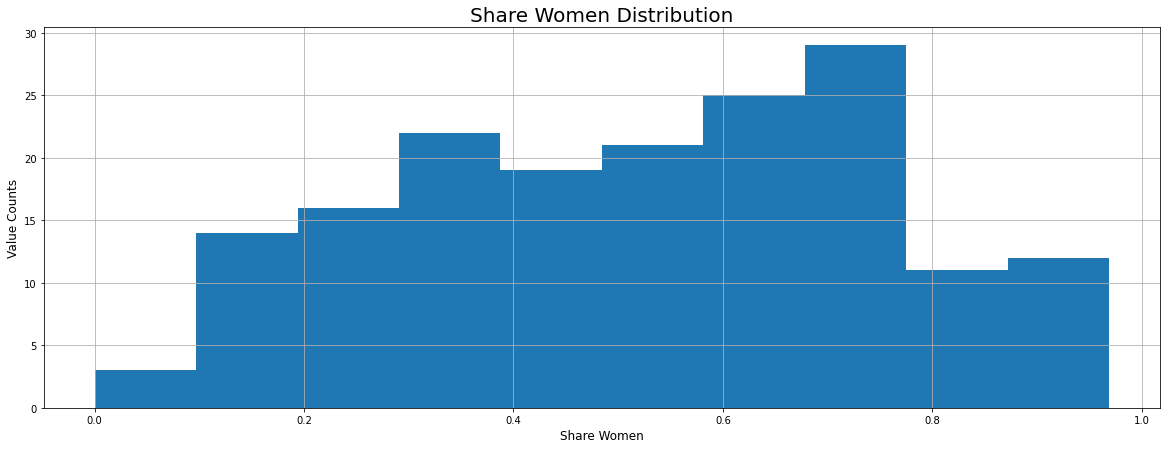

In [28]:
ax = recent_grads['share_women'].hist(figsize=(20, 7))
ax.set_title("Share Women Distribution", size=20)
ax.set_xlabel("Share Women", size=12)
ax.set_ylabel("Value Counts", size=12)

In [29]:
recent_grads['share_women'].value_counts(bins=10).sort_index()

(-0.0019690000000000003, 0.0969]     3
(0.0969, 0.194]                     14
(0.194, 0.291]                      16
(0.291, 0.388]                      22
(0.388, 0.484]                      19
(0.484, 0.581]                      21
(0.581, 0.678]                      25
(0.678, 0.775]                      29
(0.775, 0.872]                      11
(0.872, 0.969]                      12
Name: share_women, dtype: int64

Combining the histogram with the list of intervals we can extract the following conclusion:

  - Percent of majors that are predominantly male ? 

    Acording to the histogram and viewing it on the list of intervals only __3__ of the total of __172__ majors have a percentage between __0__ and __1__ feamles. In other words, __3__ of the __172__ majors have between __99%__ and __100%__ male students. To conclude, __1.74%__ of the majors are predominantly male.
    
  - Percent of majors that are predominantly female ?

    According to the list of intervals and viewing it on the charts __29__ of the total __172__ majors have a percentage between __67.8__ and __77.5__ female. To conclude, __16.8%__ of the majors are predominantly male.
        

Text(0, 0.5, 'Value Counts')

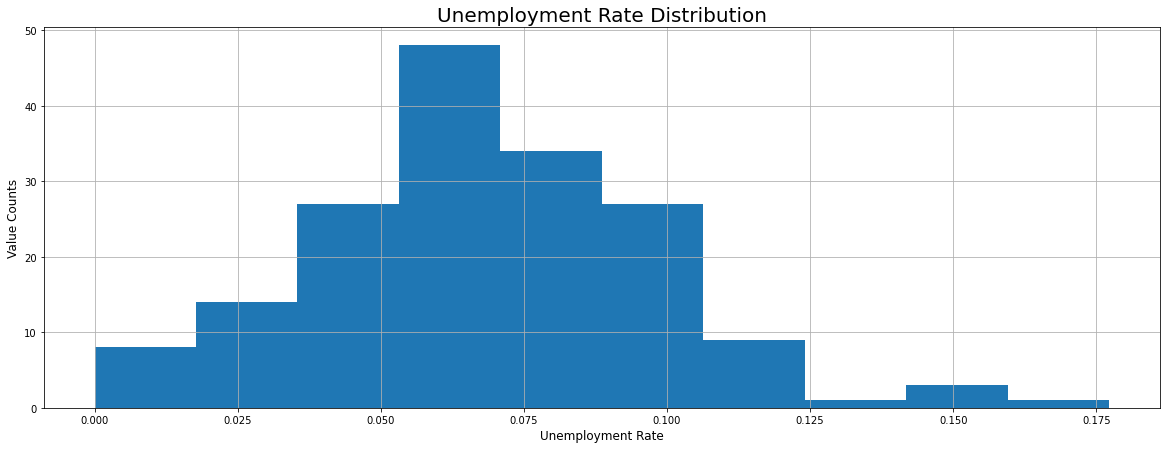

In [30]:
ax = recent_grads['unemployment_rate'].hist(figsize=(20, 7))
ax.set_title("Unemployment Rate Distribution", size=20)
ax.set_xlabel("Unemployment Rate", size=12)
ax.set_ylabel("Value Counts", size=12)

Text(0, 0.5, 'Value Counts')

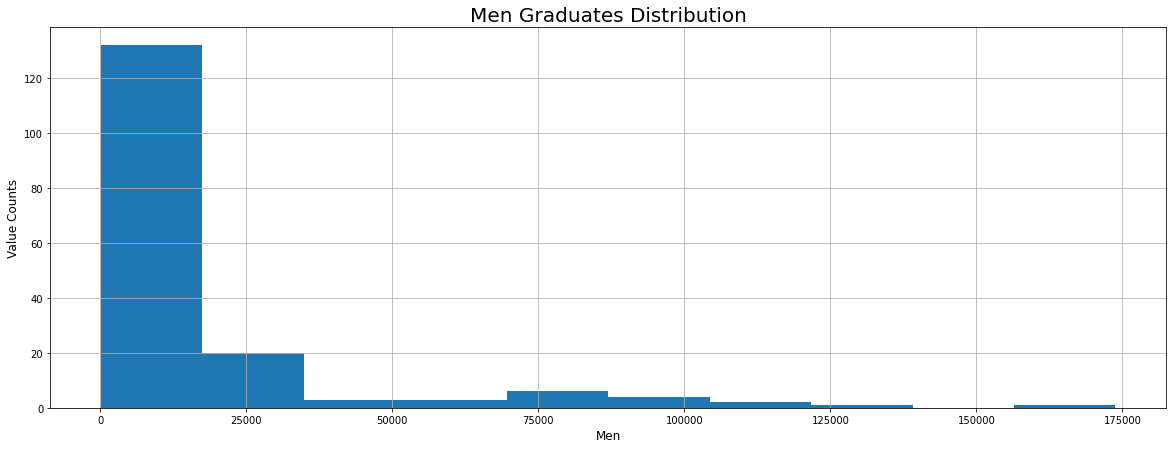

In [31]:
ax = recent_grads['men'].hist(figsize=(20, 7))
ax.set_title("Men Graduates Distribution", size=20)
ax.set_xlabel("Men", size=12)
ax.set_ylabel("Value Counts", size=12)

Text(0, 0.5, 'Value Counts')

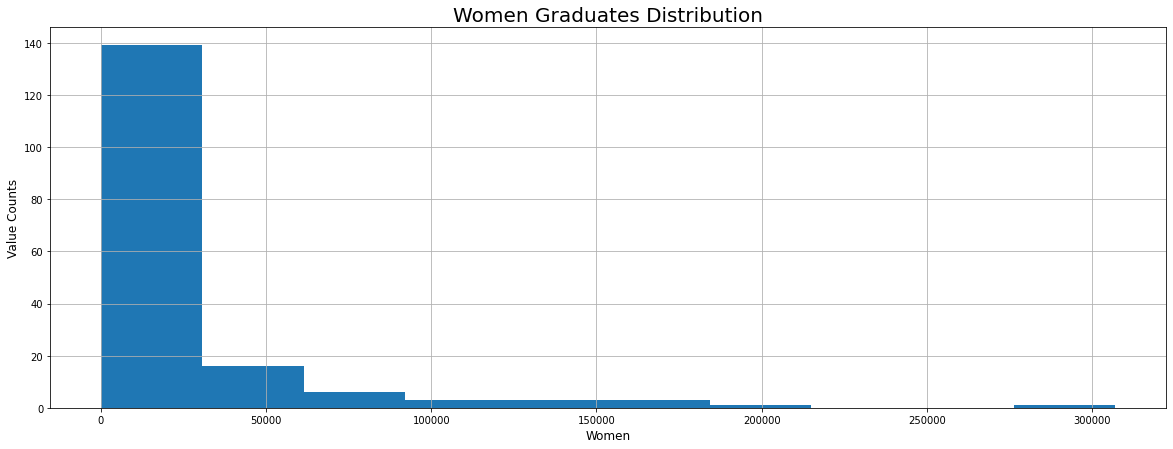

In [32]:
ax = recent_grads['women'].hist(figsize=(20, 7))
ax.set_title("Women Graduates Distribution", size=20)
ax.set_xlabel("Women", size=12)
ax.set_ylabel("Value Counts", size=12)

From the histograms above, we could answer the next questions:
- __What percent of majors are predominantly male? Predominantly female?__
    
    As is shown in the __Share Women Distribution__ chart, __1.74%__ (3/172) of the majors are predominantly male and __16.8%__ (29/172) of the majors are predominantly male.
        
    
- __What's the most common median salary range?__

    As is shown in the __Median Distribution__ histogram the most common median salary range is between __30.000__ and __40.000__, exactly __36.000__.

## Scatter Matrix Plots

To get immediate visual information from plots we are gonna work with scatter plots matrix, to see scatter plots and histograms near. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933bd1b210>,
      dtype=object)

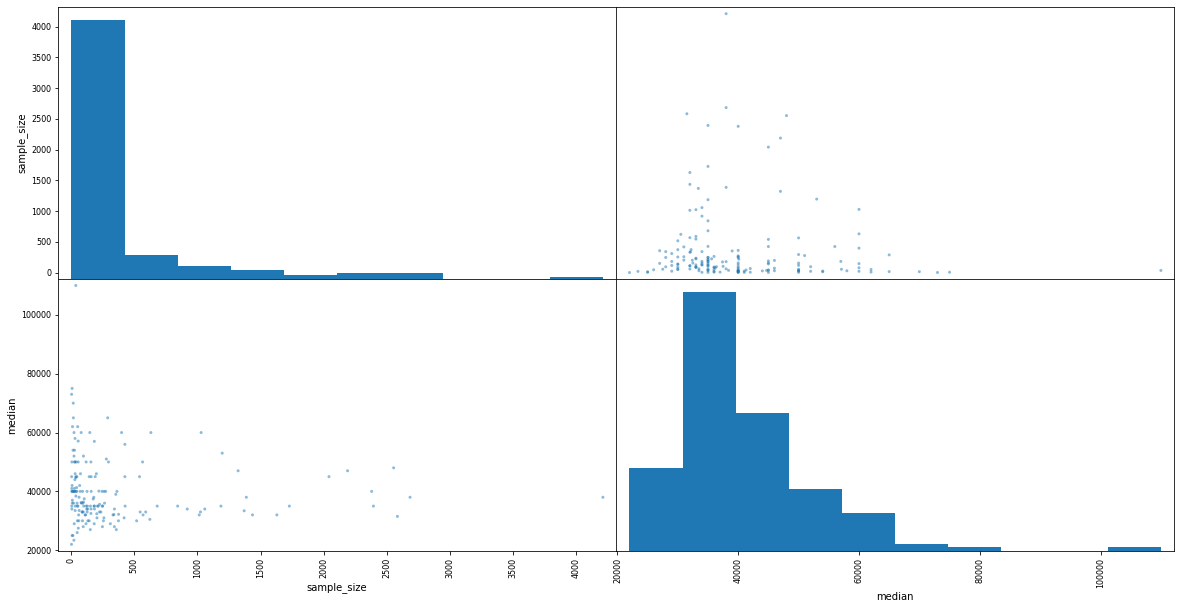

In [33]:
scatter_matrix(recent_grads[['sample_size', 'median']], figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933b77b8d0>,
      dtype=object)

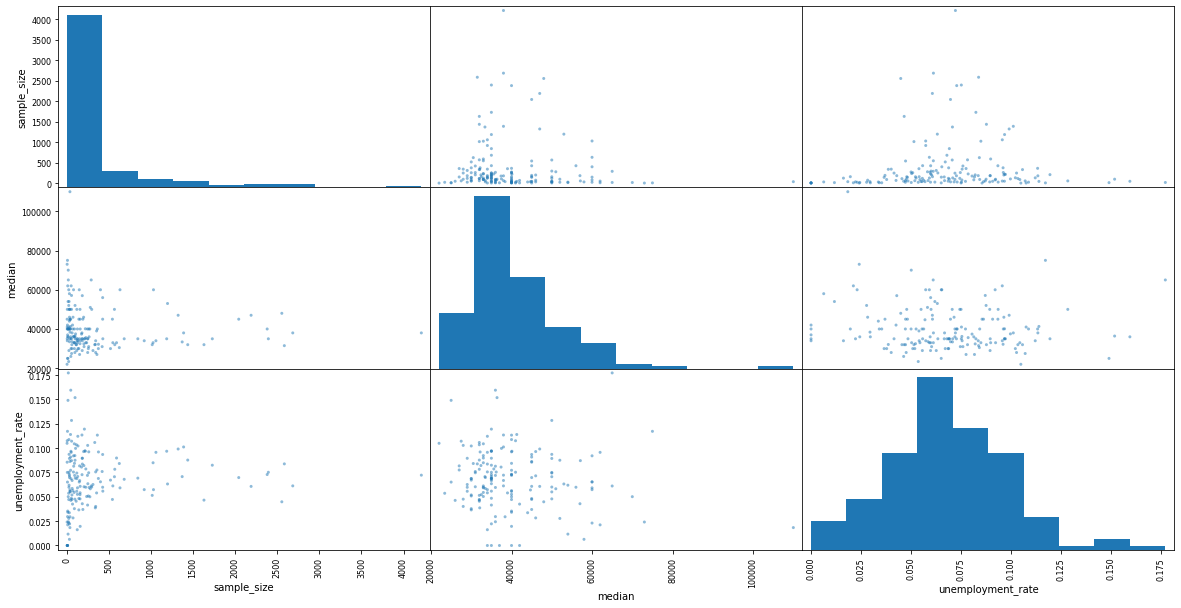

In [34]:
scatter_matrix(recent_grads[['sample_size', 'median', 'unemployment_rate']], figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933b8453d0>,
      dtype=object)

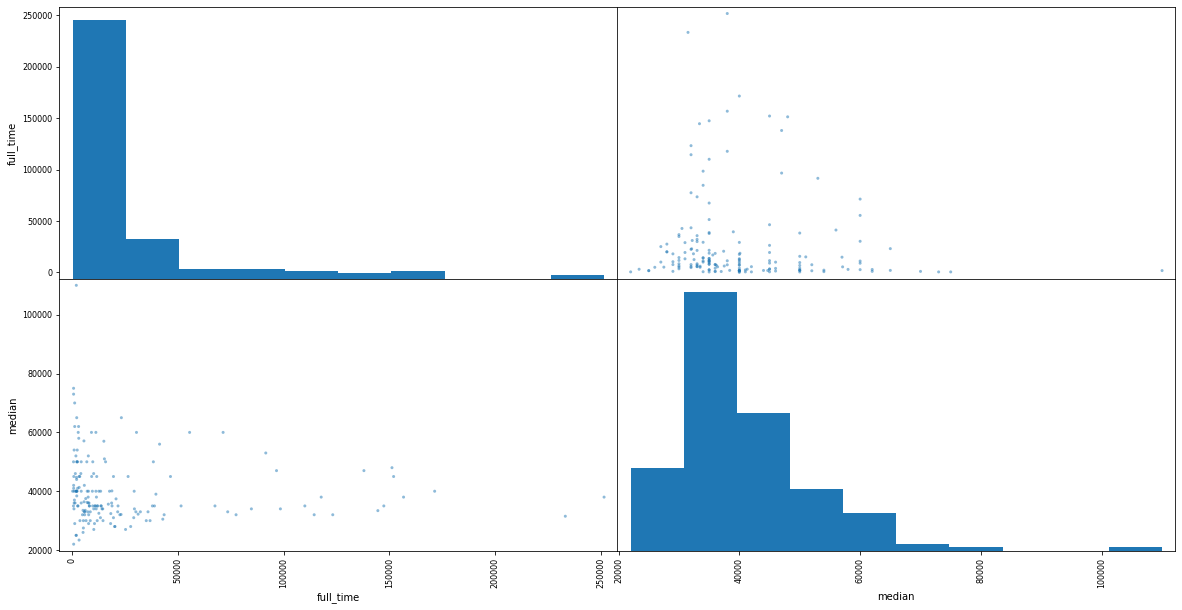

In [35]:
scatter_matrix(recent_grads[['full_time', 'median']], figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9339df9310>,
      dtype=object)

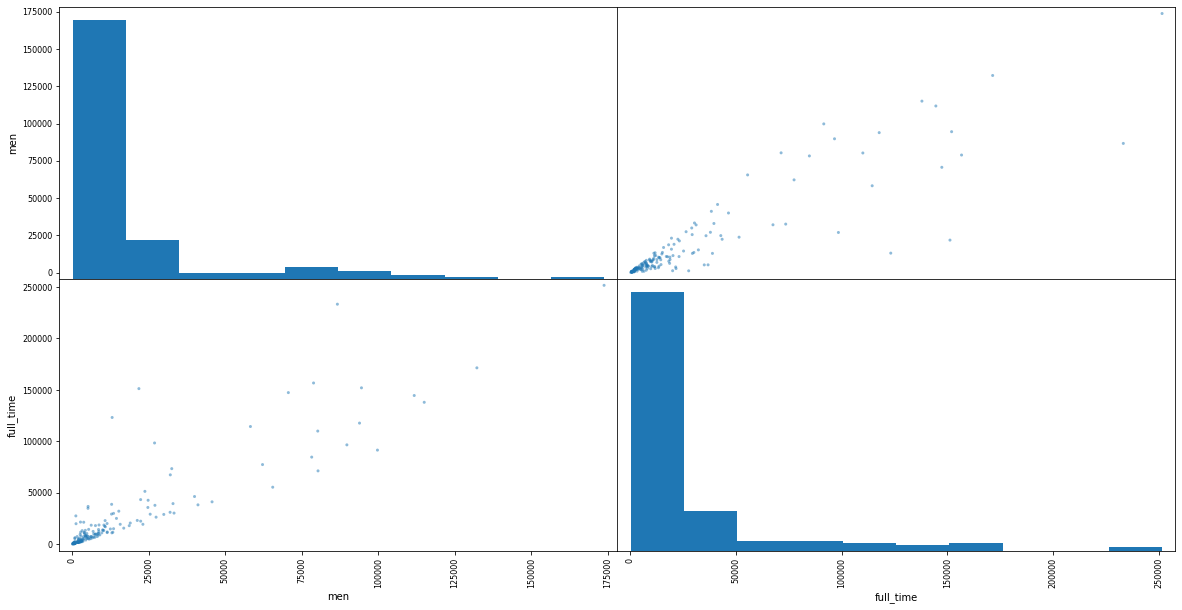

In [36]:
scatter_matrix(recent_grads[['men', 'full_time']], figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9339c41550>,
      dtype=object)

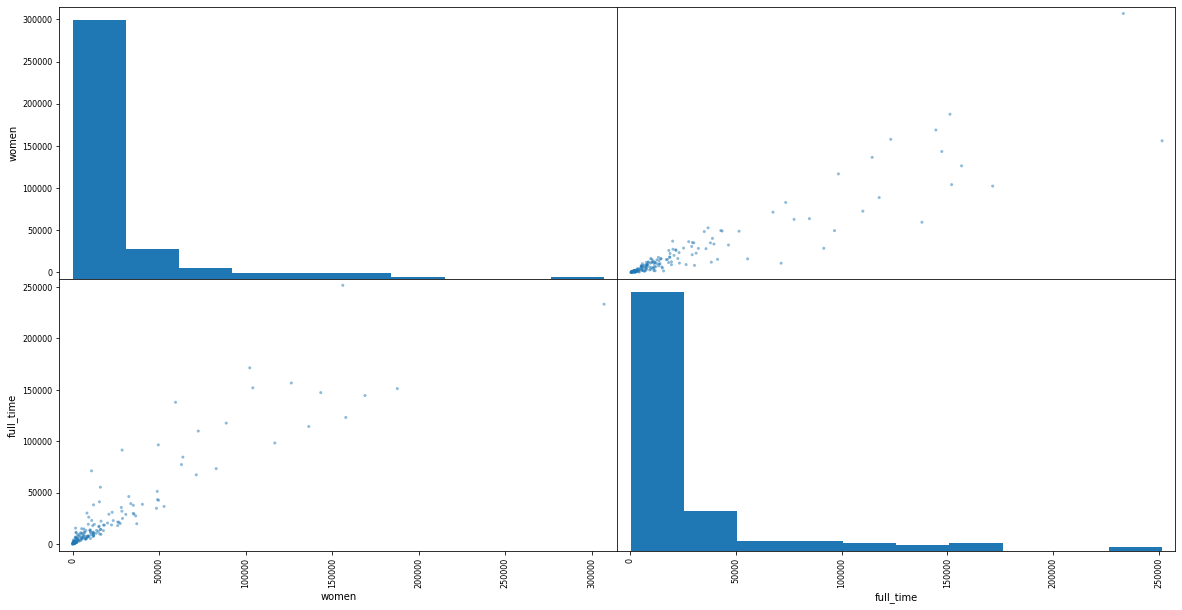

In [37]:
scatter_matrix(recent_grads[['women', 'full_time']], figsize=(20,10))

From the __scatter matrixes__ above we could observe that the median of men that have a full-time job is directly related to the median of women.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9339a80250>,
      dtype=object)

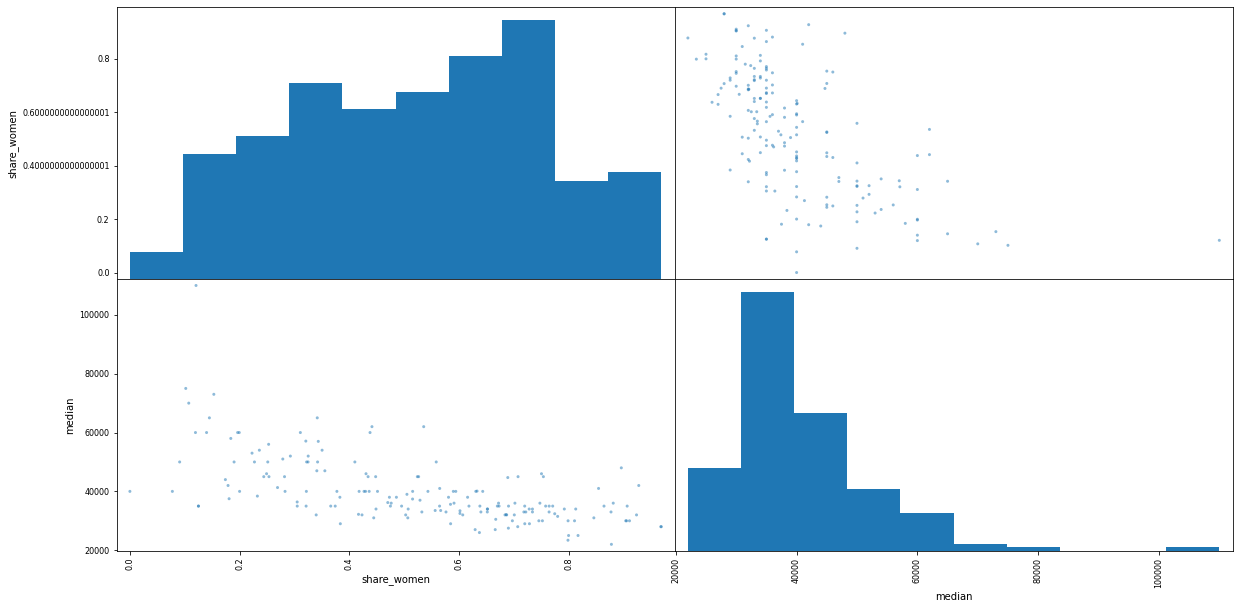

In [38]:
scatter_matrix(recent_grads[['share_women', 'median']], figsize=(20,10))

From the above __Scatter Matrix__ we conclude that students who majored in subjects with majority female students don't have a bigger income.

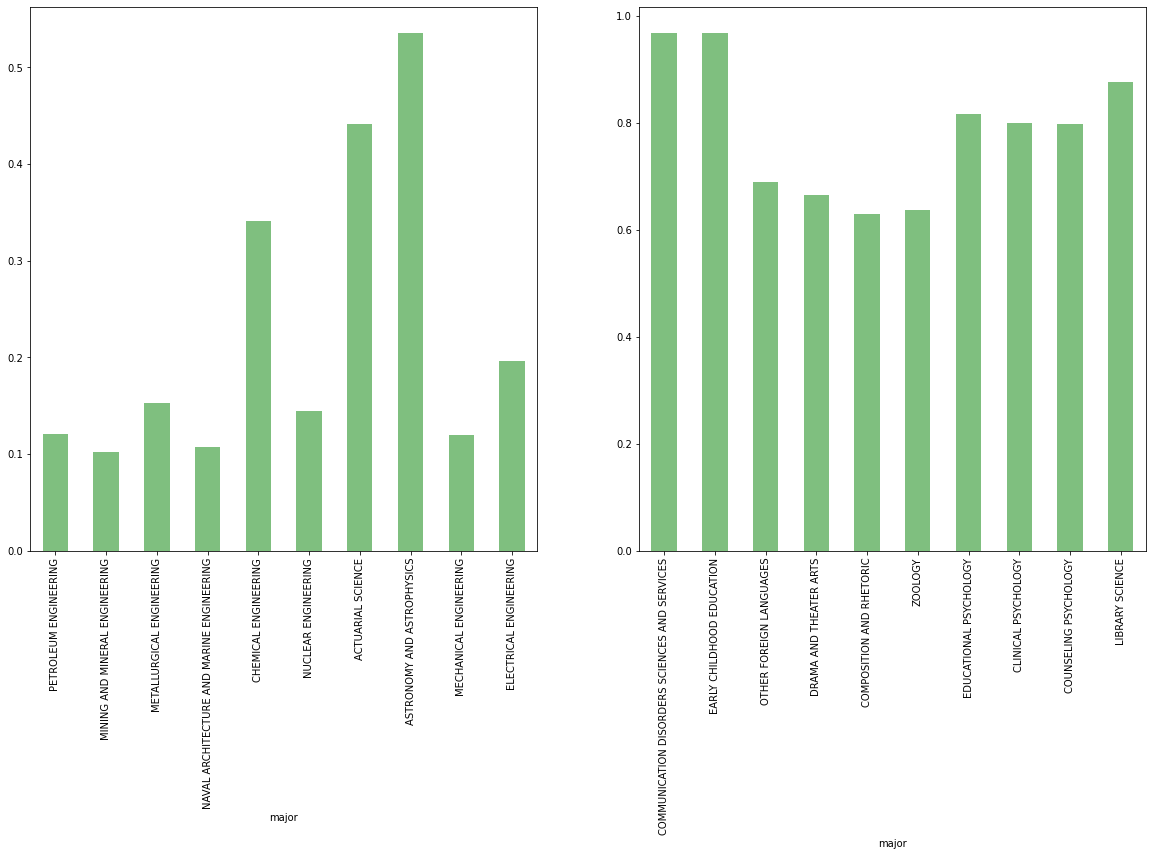

In [39]:
fig = plt.figure(figsize=(20, 10))
#fig.suptitle('First 5 & Last 5 Majors % of Women', fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

recent_grads.head(10).plot(x='major', y='share_women', kind='bar', color='green', alpha=0.5, ax=ax1, legend=False)
recent_grads.tail(10).plot(x='major', y='share_women', kind='bar', color='green', alpha=0.5, ax=ax2, legend=False)

From the plot above we could summarize that the percentage of women in the last 10 majors i bigger (from __0.65 to 0.9__) that in the first 5 (from __0.10__ to __0.55__)

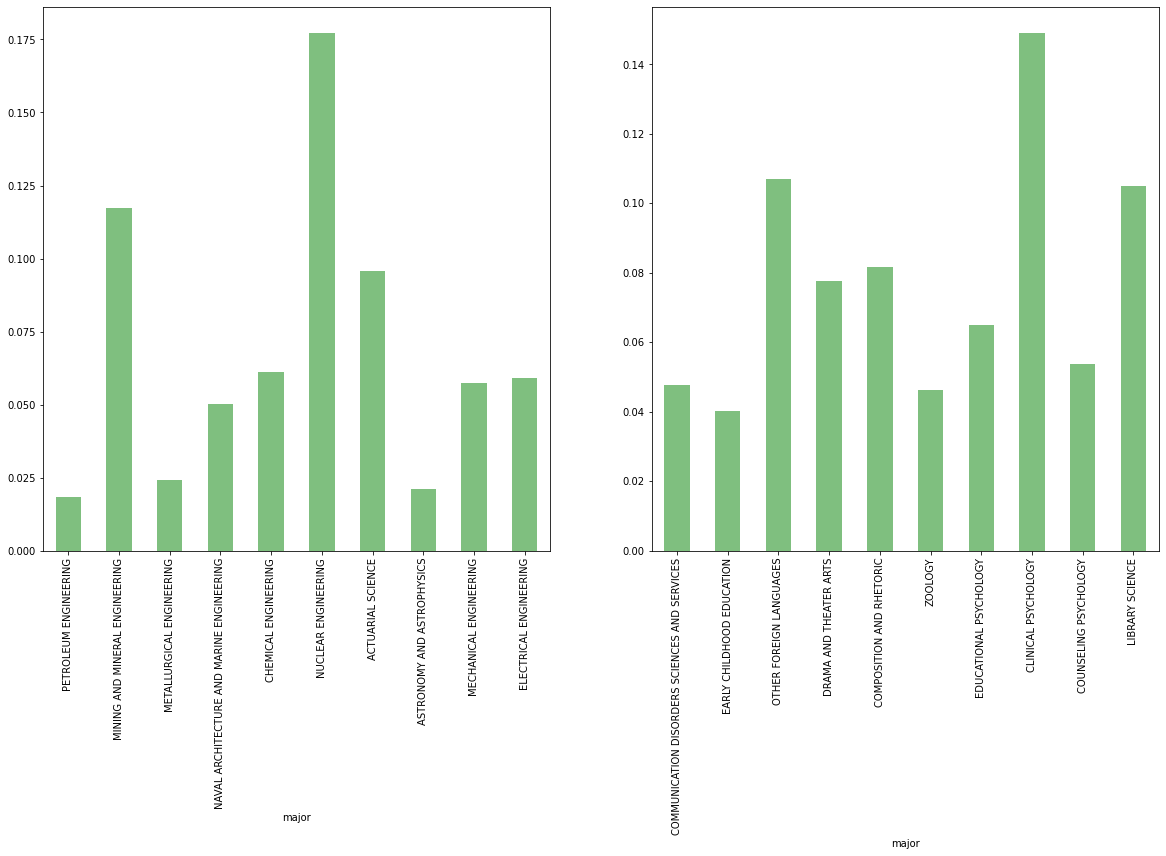

In [40]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

recent_grads.head(10).plot(x='major', y='unemployment_rate', kind='bar', color='green', alpha=0.5, ax=ax1, legend=False)
recent_grads.tail(10).plot(x='major', y='unemployment_rate', kind='bar', color='green', alpha=0.5, ax=ax2, legend=False)

From the plot above we could summarize that the __percentage of unemployment rate__ from the first 10 and last 10 majors is __close__, a fact that means that __independently__ if the major has a higher percentage of __men or women__ students, the unemployment rate tends to be the same.

## Majors categories genders distribution 

This part aims to compare for each major category the gender distribution using bar plots and extract conclusions

In [41]:
recent_grads.columns

Index(['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'share_women', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs'],
      dtype='object')

In [42]:
recent_grads['major_category'].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [43]:
recent_grads['major_category'].nunique()

16

From the previous cells we know that there are __16__ different major categories.

In [44]:
major_category_counts = recent_grads.groupby(['major_category',])['total', 'men', 'women'].sum()
major_category_counts

/home/radu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total,men,women
major_category,,,
Agriculture & Natural Resources,75620.0,40357.0,35263.0
Arts,357130.0,134390.0,222740.0
Biology & Life Science,453862.0,184919.0,268943.0
Business,1302376.0,667852.0,634524.0
Communications & Journalism,392601.0,131921.0,260680.0
Computers & Mathematics,299008.0,208725.0,90283.0
Education,559129.0,103526.0,455603.0
Engineering,537583.0,408307.0,129276.0
Health,463230.0,75517.0,387713.0


In [45]:
major_category_counts.sort_values(by=['total'], inplace=True)
major_category_counts

,total,men,women
major_category,,,
Interdisciplinary,12296.0,2817.0,9479.0
Agriculture & Natural Resources,75620.0,40357.0,35263.0
Law & Public Policy,179107.0,91129.0,87978.0
Physical Sciences,185479.0,95390.0,90089.0
Industrial Arts & Consumer Services,229792.0,103781.0,126011.0
Computers & Mathematics,299008.0,208725.0,90283.0
Arts,357130.0,134390.0,222740.0
Communications & Journalism,392601.0,131921.0,260680.0
Biology & Life Science,453862.0,184919.0,268943.0


From the previous table we can conclude that the major category with most graduates is __Business__ with __1.302.376__ followed by __Humanities & Liberal Arts__ with __713.468__ closely half.

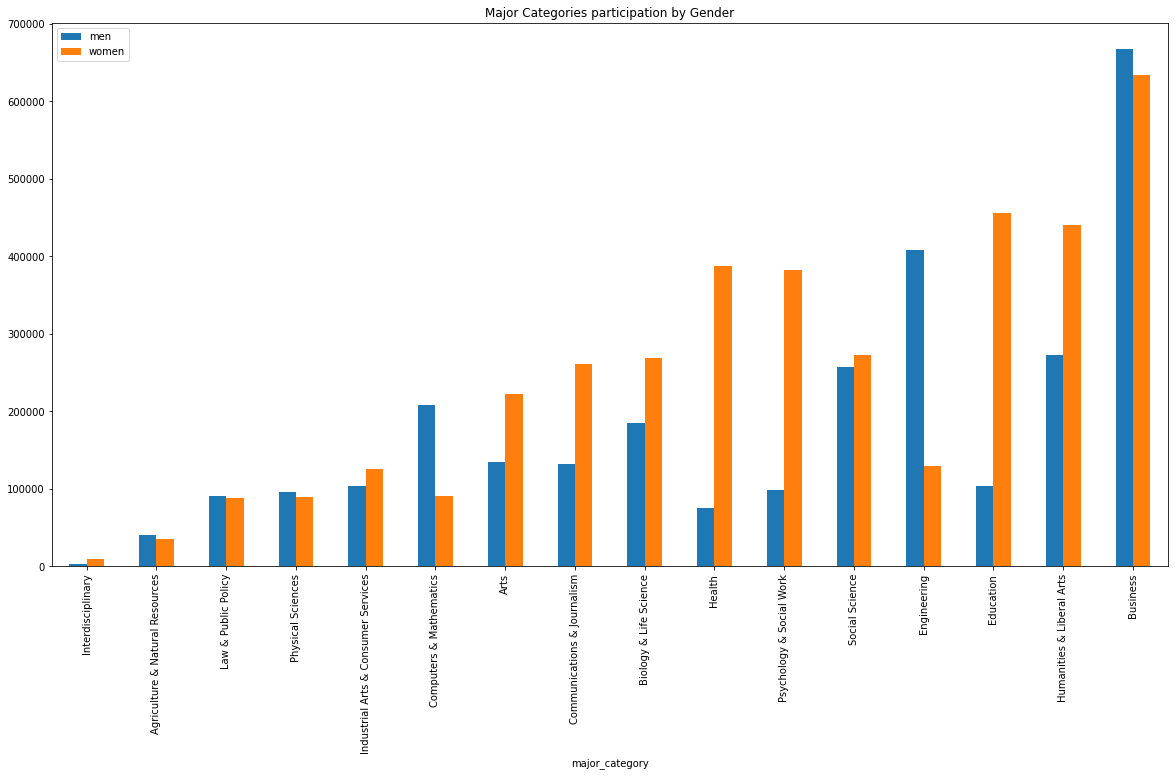

In [46]:
major_category_counts[['men','women']].plot(kind='bar', title = "Major Categories participation by Gender", figsize = (20,10))

In [48]:
len(major_category_counts[major_category_counts["men"] > major_category_counts["women"]])

6

In [49]:
len(major_category_counts[major_category_counts["men"] < major_category_counts["women"]])

10

In the plot above we can see thee gender distribution for each category. We can draw the following conclusions from it:
 - Business is the predominant category for male and female. 
 - In categories like __Computers & Mathematics__ or __Engineering__, participants are predominantly men.
 - In categories like __Health__ or __Education__, participants are predominantly women.
 - In __6__ of the __16__ categories men participation exceeds women participation.
 - In __10__ of the __16__ categories women participation exceeds men participation.

In general, we could conclude saying that male participation is focused on categories like Business, Engineering and Mathematics, on the other hand, female participation has a major diversity. 

## Major categories median earning distribution

In [50]:
recent_grads

,rank,major_code,major,total,men,women,major_category,share_women,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


Text(0.5, 1.0, 'Majors categories median earning distribution')

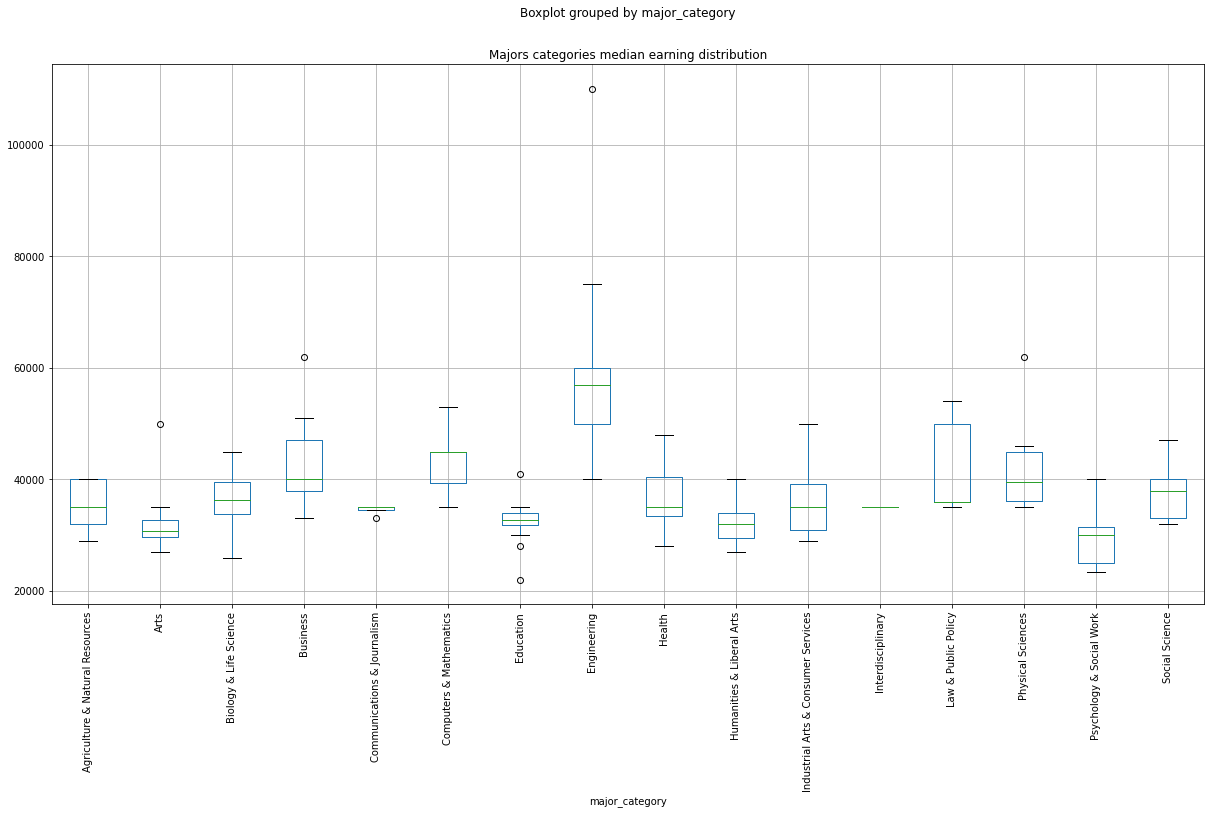

In [62]:
recent_grads.boxplot(by='major_category', column='median', figsize=(20, 10), rot=90)
plt.title('Majors categories median earning distribution')

From the boxplot above we can conclude saying:
   - The __Engineering__ category is on with bigger salaries. The median is over __55.000__ but there are some outliers with earnings over __100.000__
   - On the other had the __Psychology & Social Work__ category is the one with the lowest median. The most median earnings are in the range of __25.000__ to __35.000__.
   - __Education__ category is the next one that follows __Psychology & Social Work__ in terms of median salary earnings. 
   - The __Interdisciplinary__ category has a median of __35.000__, but its the category with lower participants followed by __Communications & Journalism__.
   
After these conclusions, one interesting approach that we will do is comparing the unemployment rate distribution among the different major categories and if there is any relation between the categories with __low earnings median__, __low participation__, and __high unemployment rate__.   

## Majors categories unemployment rate distribution

Text(0.5, 1.0, 'Majors categories unemployment rate distribution')

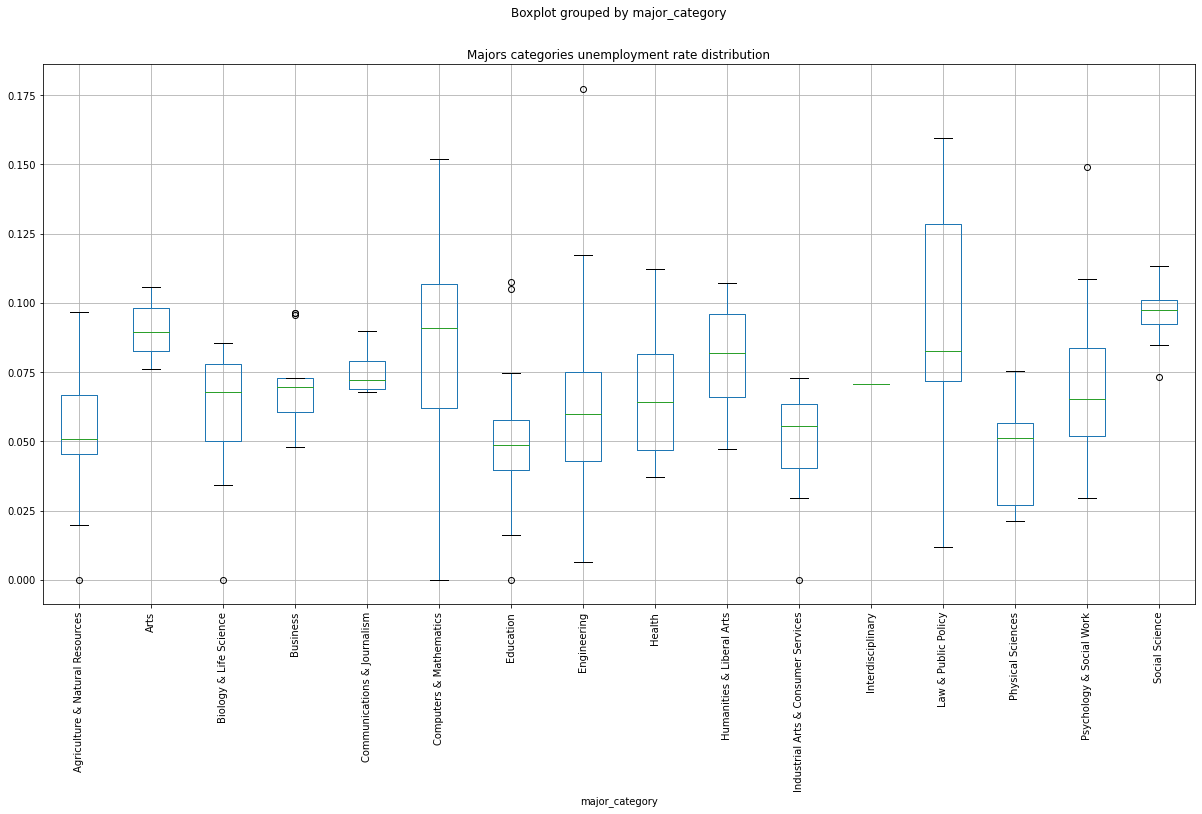

In [63]:
recent_grads.boxplot(by='major_category', column='unemployment_rate', figsize=(20, 10), rot=90)
plt.title('Majors categories unemployment rate distribution')

From the boxplot above we can conclude saying that:
- __Social Science__ is the category most affected by unemployment.
- __Social Science__ median salary is over the median in comparison with the other categories, and in terms of participants in the __4th__ on the top. We could conclude saying that is hard to find a job in this category and maintain it-
- __Education__ is the category with less unemployment rate. Is __3th__ on the top in terms of participants but as we have seen in the __Majors categories median earning distribution__ boxplot is one of the categories with lower median earnings.
- __Business__ could be seen as the category with a bigger number of participants independently of sex cause the __high__ salary and __low__ unemployment rate. 

To conclude, we can say that there is a relation between categories with __low__ median __earnings__ and __low unemployment rate__. The same relation happens for the categories with  __high__ median __earnings__ which tend to have a __median/high unemployment rate__.

## Conclusion

Through the above survey data provided by American Community Survey, this report has the following conclusions:
### Dataset Analysis

   - The majors with fewer students, independently if they are men or women, have a higher median earning of full time jobs.        
   - Students majored in subjects were majority female don't make more money.       
   - That majors that had a bigger number of full-time employees, earned the same or less than the ones with a lowe number of full-time employees.
   - As is shown in the __Share Women Distribution__ chart, __1.74%__ (3/172) of the majors are predominantly male and __16.8%__ (29/172) of the majors are predominantly male. 
   - As is shown in the __Median Distribution__ histogram the most common median salary range is between __30.000__ and __40.000__, exactly __36.000__.
   - The percentage of women in the last 10 majors i bigger (from __0.65 to 0.9__) that in the first 5 (from __0.10__ to __0.55__).

   - The __percentage of unemployment rate__ from the first 10 and last 10 majors is __close__, a fact that means that __independently__ if the major has a higher percentage of __men or women__ students, the unemployment rate tends to be the same.
   
### Majors categories genders distribution

   - Business is the predominant category for male and female. 
   - In categories like __Computers & Mathematics__ or __Engineering__, participants are predominantly men.
   - In categories like __Health__ or __Education__, participants are predominantly women.
   - In __6__ of the __16__ categories men participation exceeds women participation.
   - In __10__ of the __16__ categories women participation exceeds men participation.
   
### Major categories median earning distribution   


   - The __Engineering__ category is on with bigger salaries. The median is over __55.000__ but there are some outliers with earnings over __100.000__
   - On the other had the __Psychology & Social Work__ category is the one with the lowest median. The most median earnings are in the range of __25.000__ to __35.000__.
   - __Education__ category is the next one that follows __Psychology & Social Work__ in terms of median salary earnings. 
   - The __Interdisciplinary__ category has a median of __35.000__, but its the category with lower participants followed by __Communications & Journalism__.
   
### Majors categories unemployment rate distribution   

- __Social Science__ is the category most affected by unemployment.
- __Social Science__ median salary is over the median in comparison with the other categories, and in terms of participants in the __4th__ on the top. We could conclude saying that is hard to find a job in this category and maintain it-
- __Education__ is the category with less unemployment rate. Is __3th__ on the top in terms of participants but as we have seen in the __Majors categories median earning distribution__ boxplot is one of the categories with lower median earnings.
- __Business__ could be seen as the category with a bigger number of participants independently of sex cause the __high__ salary and __low__ unemployment rate. 
